In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models

from utils import get_cifar_dataloaders, train, test

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

EPOCH = 100
LEARNING_RATE = 1e-3
BATCH_SIZE = 64

2024-09-28 09:37:14.104945: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-09-28 09:37:14.112169: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-28 09:37:14.120876: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-28 09:37:14.123728: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-28 09:37:14.131101: I tensorflow/core/platform/cpu_feature_guar

In [2]:
train_loader, validation_loader, test_loader = get_cifar_dataloaders(BATCH_SIZE)

Files already downloaded and verified
Files already downloaded and verified


In [3]:
# Define the model architecture
model = models.resnet50() # Load the pretrained model
model.fc = nn.Linear(model.fc.in_features, 10) # Change the output layer to have 10 classes
model.to(device) # Move the model to the device

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)

In [4]:
model, history = train(train_loader, model, criterion, optimizer, EPOCH, validation_loader=validation_loader)

Epoch 1/100
  6/704 ━━━━━━━━━━━━━━━━━━━━ 21s 31ms/step - loss: 2.9399 - acc: 0.1063 - precision: 0.1063 - recall: 0.1063 - f1: 0.1063

I0000 00:00:1727505436.484923  304097 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-09-28 09:37:16.488233: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2343] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


704/704 ━━━━━━━━━━━━━━━━━━━━ 39s 54ms/step - loss: 2.2099 - acc: 0.2631 - precision: 0.2631 - recall: 0.2631 - f1: 0.2631
Validation 1/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - val_loss: 1.7943 - val_acc: 0.3192 - val_precision: 0.3192 - val_recall: 0.3192 - val_f1: 0.3192
Epoch 2/100
704/704 ━━━━━━━━━━━━━━━━━━━━ 42s 59ms/step - loss: 1.8700 - acc: 0.3573 - precision: 0.3573 - recall: 0.3573 - f1: 0.3573
Validation 2/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - val_loss: 1.8757 - val_acc: 0.3783 - val_precision: 0.3783 - val_recall: 0.3783 - val_f1: 0.3783
Epoch 3/100
704/704 ━━━━━━━━━━━━━━━━━━━━ 41s 59ms/step - loss: 1.8660 - acc: 0.3464 - precision: 0.3464 - recall: 0.3464 - f1: 0.3464
Validation 3/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - val_loss: 4.1107 - val_acc: 0.3704 - val_precision: 0.3704 - val_recall: 0.3704 - val_f1: 0.3704
Epoch 4/100
704/704 ━━━━━━━━━━━━━━━━━━━━ 42s 59ms/step - loss: 1.9000 - acc: 0.3561 - precision: 0.3561 - recall: 0.3561 - f1: 0.3561
Validati

In [5]:
preds, ys, metrics = test(test_loader, model, criterion)

Test
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.5527 - acc: 0.8220 - precision: 0.8220 - recall: 0.8220 - f1: 0.8220


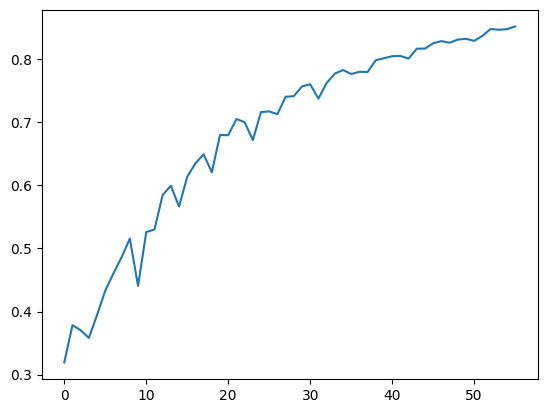

In [6]:
plt.plot(range(len(history["val_acc"])), history["val_acc"])

In [8]:
max(history["val_acc"])

tensor(0.8516)